<a href="https://colab.research.google.com/github/delowerhossentuhin/CVPR/blob/main/MID/digit.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.datasets import mnist
from google.colab import drive
import os
import random
import numpy as np
import matplotlib.pyplot as plt

In [2]:
drive.mount("/content/drive")

Mounted at /content/drive


In [3]:
gpu_device = tf.config.experimental.list_physical_devices('GPU')
print(f"Number of GPU = {len(gpu_device)}")
tf.config.experimental.set_memory_growth(gpu_device[0], True)

Number of GPU = 1


In [4]:
(X_train,Y_train),(X_test,Y_test) = mnist.load_data()
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


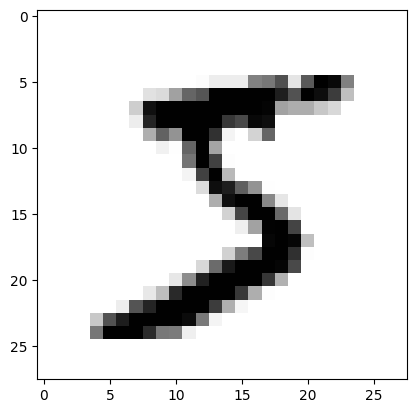

In [5]:
plt.imshow(X_train[0],cmap = "gray_r")

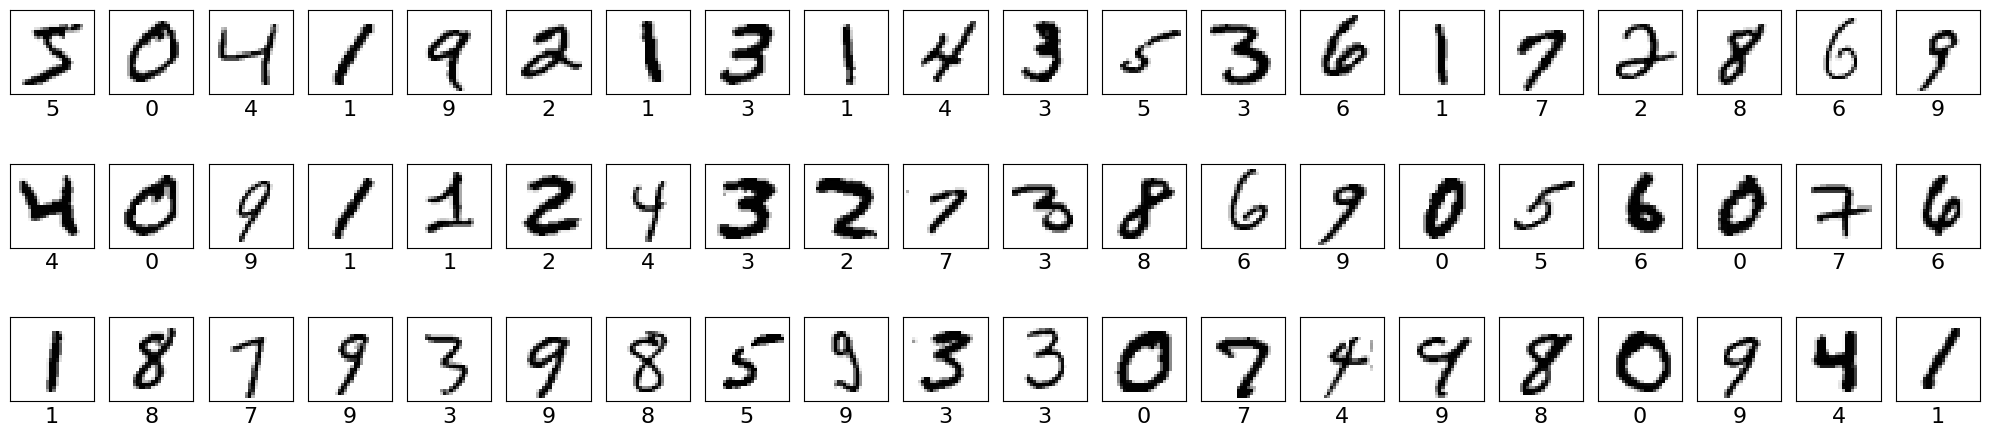

In [6]:
row = 3
column = 20
i = 0
plt.figure(figsize=(20,5))
for r in range(row):
  for c in range(column):
    plt.subplot(row,column,i+1)
    plt.imshow(X_train[i],cmap = "gray_r")
    plt.xlabel(Y_train[i],fontsize=16)
    plt.xticks([])
    plt.yticks([])
    i+=1
plt.tight_layout()
plt.show()

In [7]:
X_train = X_train.reshape(-1,28*28).astype("float32")/255.0
X_test = X_test.reshape(-1,28*28).astype("float32")/255.0
print(X_train.shape)
print(X_test.shape)

(60000, 784)
(10000, 784)


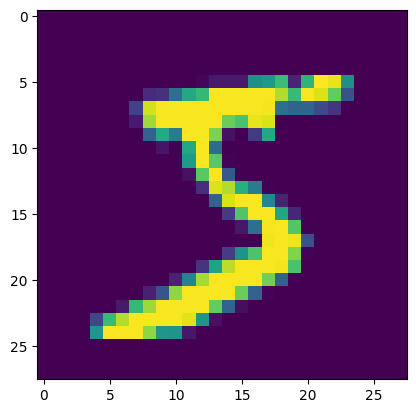

In [8]:
plt.imshow(X_train[0].reshape(28,28))

In [9]:
# Model Build
model = keras.Sequential([
    keras.Input(shape=(28*28,)),
    layers.Dense(units = 256, activation = 'relu'),
    layers.Dense(units = 128, activation = 'relu'),
    layers.Dense(units = 10, activation = 'softmax')
])
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 256)            │       200,960 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 235,146 (918.54 KB)

 Trainable params: 235,146 (918.54 KB)

 Non-trainable params: 0 (0.00 B)

**Params** = (**input_units** × **output_units**) + **output_units**

**Where:**

- **input_units** → *number of input features to the layer*  
- **output_units** → *number of neurons in the layer*  
- **+ output_units** → *for biases, one per neuron*


In [10]:
model.compile(
    optimizer = 'adam',
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
)

In [11]:
h = model.fit(x=X_train,y=Y_train,epochs=5,batch_size=32,validation_split=0.3)

Epoch 1/5
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.8736 - loss: 0.4255 - val_accuracy: 0.9614 - val_loss: 0.1268
Epoch 2/5
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9707 - loss: 0.0981 - val_accuracy: 0.9697 - val_loss: 0.1035
Epoch 3/5
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9811 - loss: 0.0611 - val_accuracy: 0.9681 - val_loss: 0.1098
Epoch 4/5
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9858 - loss: 0.0432 - val_accuracy: 0.9712 - val_loss: 0.1044
Epoch 5/5
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9889 - loss: 0.0338 - val_accuracy: 0.9722 - val_loss: 0.1050


In [12]:
model.save("/content/drive/MyDrive/Project and Coding/Computer Vision and Pattern Recognition/MNist --- Train and Test/mnist_model.h5")

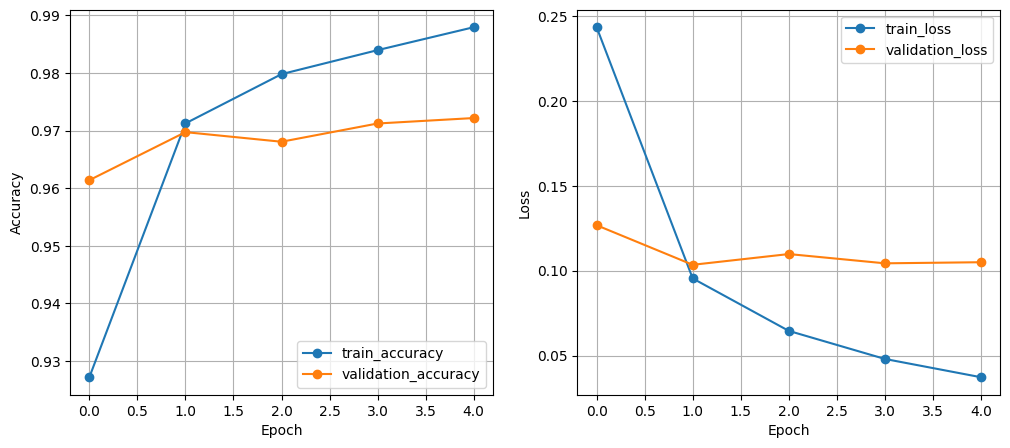

In [22]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.plot(h.history['accuracy'],'-o',label = "train_accuracy")
plt.plot(h.history['val_accuracy'],'-o',label = "validation_accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.grid(True)
plt.legend(loc = "lower right")

plt.subplot(1,2,2)
plt.plot(h.history['loss'],'-o',label = "train_loss")
plt.plot(h.history['val_loss'],'-o',label = "validation_loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.grid(True)
plt.legend(loc = 'upper right')

In [20]:
h.history['accuracy'] # --> 5 epochs

[0.9271904826164246,
 0.9712380766868591,
 0.9797857403755188,
 0.9839524030685425,
 0.987928569316864]

In [24]:
# Evaluate
test_loss, test_acc = model.evaluate(X_test,Y_test)
print("Test Accuracy",test_acc)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9722 - loss: 0.1009
Test Accuracy 0.9764999747276306
